#### GROUP MEMBERS :



##### Sandhyarani Kairam      -   700697169
##### Sravya Para             -   700706909
##### Palak Gupta             -  700706770

In [1]:
import numpy as np
import numpy as numpy
import pandas as pd
from scipy import misc
import imageio
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense #The layers in the ANN
from keras.utils import to_categorical

Using TensorFlow backend.


##### Data Preprocessing

In [2]:
missing_values = ['Unknown','UNKNOWN', np.nan]
data = pd.read_csv('groundtrueV01.csv',na_values=missing_values)
data.head()

,filepath,digits,indexnum,errornumrandomgroup1,errornumrandomgroup2,errornumrandomgroup3
0,hsf_4/f2477_69/d2477_69/d2477_69_00052.png,8,0,0,0,0
1,hsf_4/f2477_69/d2477_69/d2477_69_00017.png,4,1,0,0,0
2,hsf_4/f2477_69/d2477_69/d2477_69_00085.png,4,2,0,0,0
3,hsf_4/f2477_69/d2477_69/d2477_69_00106.png,4,3,0,0,0
4,hsf_4/f2477_69/d2477_69/d2477_69_00014.png,2,4,0,0,0


In [13]:
data.shape

(99878, 6)

In [3]:
data.isnull().sum()

filepath                0
digits                  0
indexnum                0
errornumrandomgroup1    0
errornumrandomgroup2    0
errornumrandomgroup3    0
dtype: int64

##### Understanding data

(array([ 9886., 11648.,  9887.,  9720.,  9653.,  9261., 10197., 10423.,
         9445.,  9758.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

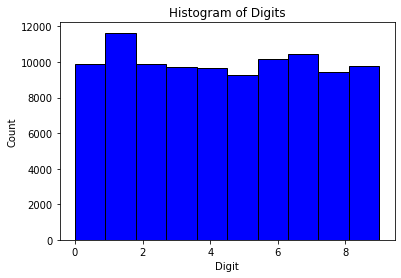

In [14]:

plt.title('Histogram of Digits')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.hist(data['digits'], color = 'blue', edgecolor = 'black')

##### Converting 28X28 images to 786 pixels data

In [15]:
x_train=np.zeros((data.shape[0],784))
y_train=np.zeros((data.shape[0]))
def image_to_pixel():
    for i in range(data.shape[0]):
        filepath = data["filepath"][i]
        image =imageio.imread(filepath)
        image = image.reshape(784)
        x_train[i] = image
        y_train[i] = data["digits"][i]
image_to_pixel()


##### Validating if the data is converted properly by using matplotlib plots

[8. 4. 4. 4. 2.]


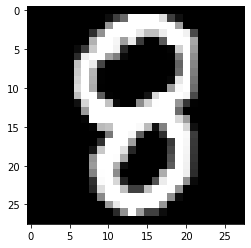

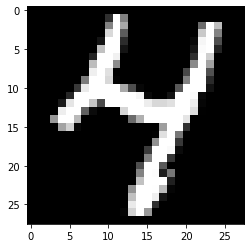

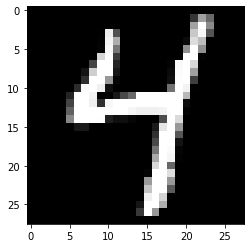

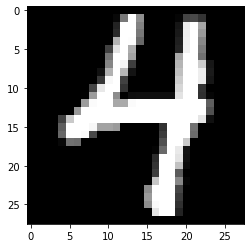

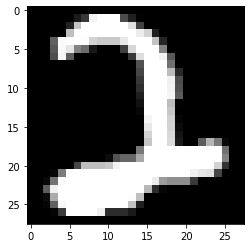

In [16]:
print(y_train[:5])
for i in range(0,5):
    first_image = x_train[i]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    

#### Training DenseNet CNN and Testing the model

In [17]:
train_images = x_train[:70000]
test_images = x_train[70000:80000]
train_labels = y_train[:70000]
test_labels = y_train[70000:80000]
model = Sequential()
model.add( Dense(64, activation='relu', input_dim=784))
model.add( Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(
  optimizer='adam',
    loss = 'categorical_crossentropy', #(classes that are greater than 2) 
    metrics = ['accuracy']
)
#Train the model
model.fit(
  train_images,
    to_categorical(train_labels), # Ex. 2 it expects [0, 0 ,1,0, 0, 0,0,0,0,0]
    epochs = 5, #The number of iterations over the entire dataset to train on
    batch_size=32 #the number of samples per gradient update for training
)
model.evaluate(
  test_images, 
  to_categorical(test_labels)
)
predictions = model.predict(test_images)

#print our models prediction 
recognized_digits = np.argmax(predictions, axis = 1)
object_id = 0
print("Overall Testing stage accuracy is: ", np.mean(recognized_digits == test_labels)*100)
for recognized_class in recognized_digits:
    print("ID = {0:5d}, recognized_digit = {1}, target_value = {2}".format(object_id,recognized_class, int(test_labels[object_id])))
    object_id += 1
print(np.mean(recognized_digits == test_labels)*100)

Epoch 1/5
70000/70000 [==============================] - 6s 80us/step - loss: 1.5129 - accuracy: 0.9358
Epoch 2/5
70000/70000 [==============================] - 5s 67us/step - loss: 0.3286 - accuracy: 0.9774
Epoch 3/5
70000/70000 [==============================] - 5s 76us/step - loss: 0.2528 - accuracy: 0.9842
Epoch 4/5
70000/70000 [==============================] - 5s 71us/step - loss: 0.2098 - accuracy: 0.9872
Epoch 5/5
10000/10000 [==============================] - 0s 47us/step
Overall Testing stage accuracy is:  99.26
ID =     0, recognized_digit = 1, target_value = 1
ID =     1, recognized_digit = 7, target_value = 7
ID =     2, recognized_digit = 8, target_value = 8
ID =     3, recognized_digit = 2, target_value = 2
ID =     4, recognized_digit = 6, target_value = 6
ID =     5, recognized_digit = 3, target_value = 3
ID =     6, recognized_digit = 1, target_value = 1
ID =     7, recognized_digit = 4, target_value = 4
ID =     8, recognized_digit = 1, target_value = 1
ID =     9, r

ID =  1334, recognized_digit = 8, target_value = 8
ID =  1335, recognized_digit = 9, target_value = 9
ID =  1336, recognized_digit = 4, target_value = 4
ID =  1337, recognized_digit = 0, target_value = 0
ID =  1338, recognized_digit = 6, target_value = 0
ID =  1339, recognized_digit = 7, target_value = 7
ID =  1340, recognized_digit = 0, target_value = 0
ID =  1341, recognized_digit = 1, target_value = 1
ID =  1342, recognized_digit = 7, target_value = 7
ID =  1343, recognized_digit = 3, target_value = 3
ID =  1344, recognized_digit = 4, target_value = 4
ID =  1345, recognized_digit = 5, target_value = 5
ID =  1346, recognized_digit = 8, target_value = 8
ID =  1347, recognized_digit = 7, target_value = 7
ID =  1348, recognized_digit = 5, target_value = 5
ID =  1349, recognized_digit = 2, target_value = 2
ID =  1350, recognized_digit = 9, target_value = 9
ID =  1351, recognized_digit = 1, target_value = 1
ID =  1352, recognized_digit = 3, target_value = 3
ID =  1353, recognized_digit = 

ID =  2813, recognized_digit = 6, target_value = 6
ID =  2814, recognized_digit = 9, target_value = 9
ID =  2815, recognized_digit = 5, target_value = 5
ID =  2816, recognized_digit = 1, target_value = 1
ID =  2817, recognized_digit = 3, target_value = 3
ID =  2818, recognized_digit = 6, target_value = 6
ID =  2819, recognized_digit = 9, target_value = 9
ID =  2820, recognized_digit = 7, target_value = 7
ID =  2821, recognized_digit = 7, target_value = 7
ID =  2822, recognized_digit = 4, target_value = 9
ID =  2823, recognized_digit = 1, target_value = 1
ID =  2824, recognized_digit = 4, target_value = 4
ID =  2825, recognized_digit = 2, target_value = 2
ID =  2826, recognized_digit = 7, target_value = 7
ID =  2827, recognized_digit = 2, target_value = 2
ID =  2828, recognized_digit = 1, target_value = 1
ID =  2829, recognized_digit = 1, target_value = 1
ID =  2830, recognized_digit = 1, target_value = 1
ID =  2831, recognized_digit = 8, target_value = 8
ID =  2832, recognized_digit = 

ID =  4598, recognized_digit = 2, target_value = 2
ID =  4599, recognized_digit = 6, target_value = 6
ID =  4600, recognized_digit = 8, target_value = 8
ID =  4601, recognized_digit = 1, target_value = 1
ID =  4602, recognized_digit = 0, target_value = 0
ID =  4603, recognized_digit = 5, target_value = 5
ID =  4604, recognized_digit = 0, target_value = 0
ID =  4605, recognized_digit = 3, target_value = 3
ID =  4606, recognized_digit = 5, target_value = 5
ID =  4607, recognized_digit = 6, target_value = 6
ID =  4608, recognized_digit = 2, target_value = 2
ID =  4609, recognized_digit = 3, target_value = 3
ID =  4610, recognized_digit = 3, target_value = 3
ID =  4611, recognized_digit = 6, target_value = 6
ID =  4612, recognized_digit = 8, target_value = 8
ID =  4613, recognized_digit = 1, target_value = 1
ID =  4614, recognized_digit = 8, target_value = 8
ID =  4615, recognized_digit = 7, target_value = 7
ID =  4616, recognized_digit = 6, target_value = 6
ID =  4617, recognized_digit = 

ID =  5960, recognized_digit = 4, target_value = 4
ID =  5961, recognized_digit = 8, target_value = 8
ID =  5962, recognized_digit = 9, target_value = 9
ID =  5963, recognized_digit = 3, target_value = 3
ID =  5964, recognized_digit = 2, target_value = 2
ID =  5965, recognized_digit = 9, target_value = 9
ID =  5966, recognized_digit = 1, target_value = 1
ID =  5967, recognized_digit = 3, target_value = 3
ID =  5968, recognized_digit = 5, target_value = 5
ID =  5969, recognized_digit = 4, target_value = 4
ID =  5970, recognized_digit = 1, target_value = 1
ID =  5971, recognized_digit = 2, target_value = 2
ID =  5972, recognized_digit = 7, target_value = 7
ID =  5973, recognized_digit = 1, target_value = 1
ID =  5974, recognized_digit = 0, target_value = 0
ID =  5975, recognized_digit = 1, target_value = 1
ID =  5976, recognized_digit = 2, target_value = 2
ID =  5977, recognized_digit = 3, target_value = 3
ID =  5978, recognized_digit = 5, target_value = 5
ID =  5979, recognized_digit = 

ID =  7331, recognized_digit = 2, target_value = 2
ID =  7332, recognized_digit = 6, target_value = 6
ID =  7333, recognized_digit = 7, target_value = 7
ID =  7334, recognized_digit = 2, target_value = 2
ID =  7335, recognized_digit = 9, target_value = 9
ID =  7336, recognized_digit = 4, target_value = 4
ID =  7337, recognized_digit = 1, target_value = 1
ID =  7338, recognized_digit = 1, target_value = 1
ID =  7339, recognized_digit = 5, target_value = 5
ID =  7340, recognized_digit = 7, target_value = 7
ID =  7341, recognized_digit = 1, target_value = 1
ID =  7342, recognized_digit = 4, target_value = 4
ID =  7343, recognized_digit = 0, target_value = 0
ID =  7344, recognized_digit = 5, target_value = 5
ID =  7345, recognized_digit = 9, target_value = 9
ID =  7346, recognized_digit = 4, target_value = 4
ID =  7347, recognized_digit = 5, target_value = 5
ID =  7348, recognized_digit = 1, target_value = 1
ID =  7349, recognized_digit = 4, target_value = 4
ID =  7350, recognized_digit = 

ID =  9283, recognized_digit = 7, target_value = 7
ID =  9284, recognized_digit = 8, target_value = 8
ID =  9285, recognized_digit = 9, target_value = 9
ID =  9286, recognized_digit = 5, target_value = 5
ID =  9287, recognized_digit = 7, target_value = 7
ID =  9288, recognized_digit = 6, target_value = 6
ID =  9289, recognized_digit = 5, target_value = 5
ID =  9290, recognized_digit = 4, target_value = 4
ID =  9291, recognized_digit = 0, target_value = 0
ID =  9292, recognized_digit = 9, target_value = 9
ID =  9293, recognized_digit = 8, target_value = 8
ID =  9294, recognized_digit = 2, target_value = 2
ID =  9295, recognized_digit = 6, target_value = 6
ID =  9296, recognized_digit = 1, target_value = 1
ID =  9297, recognized_digit = 0, target_value = 0
ID =  9298, recognized_digit = 5, target_value = 5
ID =  9299, recognized_digit = 1, target_value = 1
ID =  9300, recognized_digit = 8, target_value = 8
ID =  9301, recognized_digit = 0, target_value = 0
ID =  9302, recognized_digit = 